##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2021-01-07 14:32:36--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.164.144, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   204MB/s    in 0.4s    

2021-01-07 14:32:36 (204 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                   

In [3]:
import tensorflow as tf

# visualize pretrained_model architecture
tf.keras.utils.plot_model(pre_trained_model, show_shapes=True)

In [4]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [5]:
# visualize modified-pretrained_model architecture
tf.keras.utils.plot_model(model, show_shapes=True)

In [7]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

--2021-01-07 14:59:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 142.250.73.208, 142.250.73.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   162MB/s    in 0.4s    

2021-01-07 14:59:16 (162 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 30s - loss: 0.3336 - accuracy: 0.8695 - val_loss: 0.1212 - val_accuracy: 0.9540
Epoch 2/20
100/100 - 19s - loss: 0.2356 - accuracy: 0.9110 - val_loss: 0.1438 - val_accuracy: 0.9480
Epoch 3/20
100/100 - 19s - loss: 0.2273 - accuracy: 0.9225 - val_loss: 0.1121 - val_accuracy: 0.9600
Epoch 4/20
100/100 - 19s - loss: 0.1886 - accuracy: 0.9310 - val_loss: 0.1164 - val_accuracy: 0.9600
Epoch 5/20
100/100 - 19s - loss: 0.1886 - accuracy: 0.9350 - val_loss: 0.2251 - val_accuracy: 0.9320
Epoch 6/20
100/100 - 19s - loss: 0.1695 - accuracy: 0.9400 - val_loss: 0.1235 - val_accuracy: 0.9630
Epoch 7/20
100/100 - 19s - loss: 0.1872 - accuracy: 0.9325 - val_loss: 0.1099 - val_accuracy: 0.9650
Epoch 8/20
100/100 - 18s - loss: 0.1658 - accuracy: 0.9415 - val_loss: 0.1008 - val_accuracy: 0.9720
Epoch 9/20
100/100 - 18s - loss: 0.1424 - accuracy: 0.9525 - val_loss: 0.1286 - val_accuracy: 0.9650
Epoch 10/20
100/100 - 18s - loss: 0.1723 - accuracy: 0.9455 - val_loss: 0.2614 - val_accura

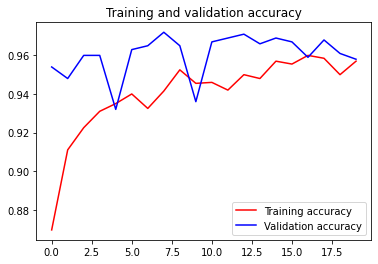

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a dog or a cat.

In [10]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving 1554192430.jpg to 1554192430.jpg
Saving 5-langkah-penanganan-luka-gigitan-anjing.jpg to 5-langkah-penanganan-luka-gigitan-anjing.jpg
Saving Cbt5VKOUMAA7cuK.jpg to Cbt5VKOUMAA7cuK.jpg
Saving c420751f876b54ad3dc3f416264faa31.jpg to c420751f876b54ad3dc3f416264faa31.jpg
Saving bbd909c686861ce2acd6eeb2aba6540e.jpg to bbd909c686861ce2acd6eeb2aba6540e.jpg
Saving file-20200812-18-kmz4ah.jpg to file-20200812-18-kmz4ah.jpg
Saving 9544115_201810080930410374.jpg to 9544115_201810080930410374.jpg
Saving images.jpg to images.jpg
Saving download.jpg to download.jpg
Saving 73724_kucing-absurd.jpg to 73724_kucing-absurd.jpg
[0.]
1554192430.jpg is a cat
[0.]
5-langkah-penanganan-luka-gigitan-anjing.jpg is a cat
[0.]
Cbt5VKOUMAA7cuK.jpg is a cat
[0.]
c420751f876b54ad3dc3f416264faa31.jpg is a cat
[0.]
bbd909c686861ce2acd6eeb2aba6540e.jpg is a cat
[0.]
file-20200812-18-kmz4ah.jpg is a cat
[0.]
9544115_201810080930410374.jpg is a cat
[0.]
images.jpg is a cat
[0.]
download.jpg is a cat
[0.]
73724_kuci